In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#add csv file
cryptonews = pd.read_csv('/Users/jeronimoperezrocha/Library/Containers/com.microsoft.Excel/Data/Downloads/cryptonews_modified.csv')
print(cryptonews)
df_cryptonews = pd.DataFrame(cryptonews)

          Date1  sentiment
0        4/5/23         -1
1        4/5/23          0
2        4/5/23         -1
3        4/5/23          1
4        4/4/23          1
...         ...        ...
18538  10/27/21          0
18539  10/19/21          1
18540  10/18/21          1
18541  10/15/21          0
18542  10/12/21          1

[18543 rows x 2 columns]


In [3]:
df_cryptonews.head()

,Date1,sentiment
0,4/5/23,-1
1,4/5/23,0
2,4/5/23,-1
3,4/5/23,1
4,4/4/23,1


In [4]:
ticker_symbols = ['BTC-USD', 'ETH-USD', 'COIN', '^GSPC', '^IXIC']
ticker_data = pd.DataFrame()

start_date = '2021-04-30'
end_date = '2023-11-18'

for symbol in ticker_symbols:
    ticker_symbols = yf.Ticker(symbol)
    data = ticker_symbols.history(period='30', start=start_date, end=end_date)
    data.index = data.index.date
    ticker_data[symbol] = data['Close']
ticker_data.reset_index(inplace=True)
ticker_data.rename(columns={'index': 'Date'}, inplace=True)

In [5]:
ticker_data

,Date,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
0,2021-04-30,57750.175781,2773.207031,297.640015,4181.169922,13962.679688
1,2021-05-01,57828.050781,2945.892822,NaN,NaN,NaN
2,2021-05-02,56631.078125,2952.056152,NaN,NaN,NaN
3,2021-05-03,57200.292969,3431.086182,294.209991,4192.660156,13895.120117
4,2021-05-04,53333.539062,3253.629395,280.660004,4164.660156,13633.500000
...,...,...,...,...,...,...
927,2023-11-13,36502.355469,2055.265381,92.639999,4411.549805,13767.740234
928,2023-11-14,35537.640625,1979.052612,92.089996,4495.700195,14094.379883
929,2023-11-15,37880.582031,2060.408447,98.150002,4502.879883,14103.839844
930,2023-11-16,36154.769531,1960.881592,96.919998,4508.240234,14113.669922


In [6]:
ticker_data.describe()

,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
count,932.000000,932.000000,644.000000,644.000000,644.000000
mean,32830.661441,2246.022512,133.953245,4235.768370,13096.549401
std,11987.059638,906.705969,89.603978,270.433977,1508.446886
min,15787.284180,993.636780,32.529999,3577.030029,10213.290039
25%,23172.688477,1612.668243,62.899999,4019.192444,11750.835449
50%,29607.670898,1872.136841,80.715000,4251.415039,13313.870117
75%,40972.169922,2923.440918,227.622498,4449.314941,14241.147461
max,67566.828125,4812.087402,357.390015,4796.560059,16057.440430


In [7]:
ticker_data.tail()

,Date,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
927,2023-11-13,36502.355469,2055.265381,92.639999,4411.549805,13767.740234
928,2023-11-14,35537.640625,1979.052612,92.089996,4495.700195,14094.379883
929,2023-11-15,37880.582031,2060.408447,98.150002,4502.879883,14103.839844
930,2023-11-16,36154.769531,1960.881592,96.919998,4508.240234,14113.669922
931,2023-11-17,36596.683594,1961.280762,99.050003,4514.020020,14125.480469


In [8]:
ticker_data.describe()

,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
count,932.000000,932.000000,644.000000,644.000000,644.000000
mean,32830.661441,2246.022512,133.953245,4235.768370,13096.549401
std,11987.059638,906.705969,89.603978,270.433977,1508.446886
min,15787.284180,993.636780,32.529999,3577.030029,10213.290039
25%,23172.688477,1612.668243,62.899999,4019.192444,11750.835449
50%,29607.670898,1872.136841,80.715000,4251.415039,13313.870117
75%,40972.169922,2923.440918,227.622498,4449.314941,14241.147461
max,67566.828125,4812.087402,357.390015,4796.560059,16057.440430


In [9]:
#concatenate dataframes using only one date column
crypto_data = pd.concat([df_cryptonews, ticker_data], axis=1, join='inner')

In [10]:
crypto_data

,Date1,sentiment,Date,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
0,4/5/23,-1,2021-04-30,57750.175781,2773.207031,297.640015,4181.169922,13962.679688
1,4/5/23,0,2021-05-01,57828.050781,2945.892822,NaN,NaN,NaN
2,4/5/23,-1,2021-05-02,56631.078125,2952.056152,NaN,NaN,NaN
3,4/5/23,1,2021-05-03,57200.292969,3431.086182,294.209991,4192.660156,13895.120117
4,4/4/23,1,2021-05-04,53333.539062,3253.629395,280.660004,4164.660156,13633.500000
...,...,...,...,...,...,...,...,...
927,3/14/23,0,2023-11-13,36502.355469,2055.265381,92.639999,4411.549805,13767.740234
928,3/14/23,1,2023-11-14,35537.640625,1979.052612,92.089996,4495.700195,14094.379883
929,3/14/23,-1,2023-11-15,37880.582031,2060.408447,98.150002,4502.879883,14103.839844
930,3/14/23,0,2023-11-16,36154.769531,1960.881592,96.919998,4508.240234,14113.669922


In [11]:
crypto_data = crypto_data.drop(['Date1'], axis=1)

In [12]:
crypto_data

,sentiment,Date,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
0,-1,2021-04-30,57750.175781,2773.207031,297.640015,4181.169922,13962.679688
1,0,2021-05-01,57828.050781,2945.892822,NaN,NaN,NaN
2,-1,2021-05-02,56631.078125,2952.056152,NaN,NaN,NaN
3,1,2021-05-03,57200.292969,3431.086182,294.209991,4192.660156,13895.120117
4,1,2021-05-04,53333.539062,3253.629395,280.660004,4164.660156,13633.500000
...,...,...,...,...,...,...,...
927,0,2023-11-13,36502.355469,2055.265381,92.639999,4411.549805,13767.740234
928,1,2023-11-14,35537.640625,1979.052612,92.089996,4495.700195,14094.379883
929,-1,2023-11-15,37880.582031,2060.408447,98.150002,4502.879883,14103.839844
930,0,2023-11-16,36154.769531,1960.881592,96.919998,4508.240234,14113.669922


In [14]:
crypto_data = crypto_data.drop(['Rolling_Median', 'Ratio'], axis=1)

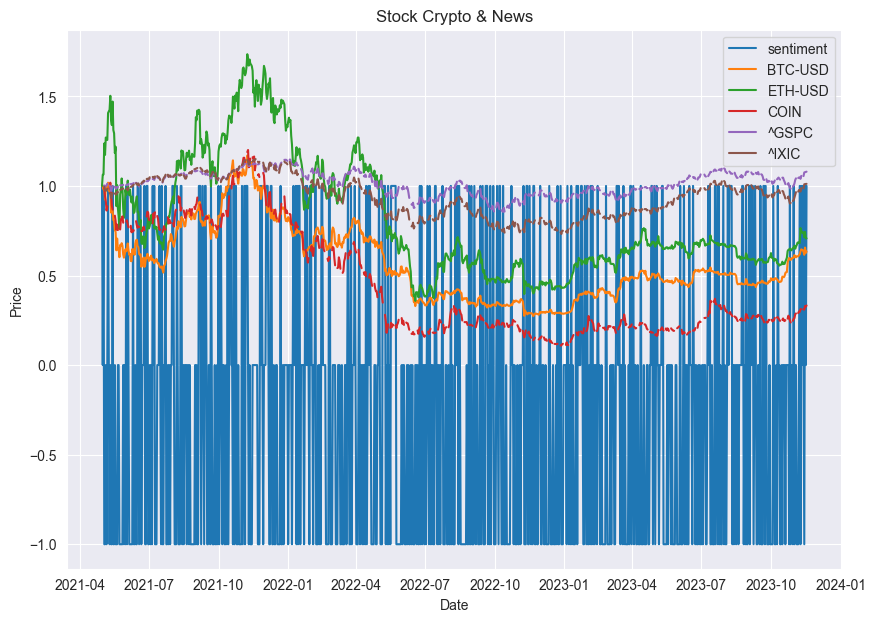

In [15]:

# Normalize the data (excluding 'Date' column)
numeric_columns = crypto_data.select_dtypes(include=['float64', 'int64'])
crypto_data[numeric_columns.columns] = numeric_columns / numeric_columns.iloc[0, :]

# Set 'Date' as the index for plotting
crypto_data.set_index('Date', inplace=True)

# Plotting
#change the color of sentiment to a lighter color

crypto_data.plot(figsize=(10, 7))
plt.title('Stock Crypto & News')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [16]:
crypto_data.corr()

,sentiment,BTC-USD,ETH-USD,COIN,^GSPC,^IXIC
sentiment,1.000000,0.058855,0.047792,0.040735,0.081000,0.072495
BTC-USD,0.058855,1.000000,0.963833,0.910547,0.742671,0.836601
ETH-USD,0.047792,0.963833,1.000000,0.904157,0.729079,0.803326
COIN,0.040735,0.910547,0.904157,1.000000,0.673564,0.837059
^GSPC,0.081000,0.742671,0.729079,0.673564,1.000000,0.941089
^IXIC,0.072495,0.836601,0.803326,0.837059,0.941089,1.000000


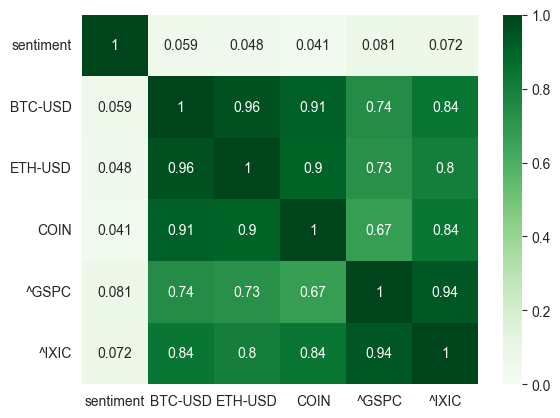

In [17]:
sns.heatmap(crypto_data.corr(), annot=True, cmap='Greens', vmin=0, vmax=1)
plt.show()